In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st

In [2]:
rnd.randn(10)

array([ 1.09053177,  1.18330446,  0.45673659, -0.65049814, -0.02011038,
        0.04099039,  0.50670816,  3.03137926, -0.59195109,  2.05044986])

In [11]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs): 
    num_bins = len(data)    
    sorted_data = np.array(sorted(data), dtype=np.float64) 
    data_range = sorted_data[-1] - sorted_data[0] 
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins) 
    xvalues = bin_edges[1:] 
    yvalues = np.cumsum(counts) 
    if plot_range is None: 
        xmin = sorted_data[0] 
        xmax = sorted_data[-1] 
    else: 
        xmin, xmax = plot_range 
    #pad the arrays 
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]]) 
    yvalues = np.concatenate([[0.0, 0.0], yvalues, [yvalues.max()]]) 
    if scale_to is not None: 
        yvalues = yvalues / len(data) * scale_to 
    print xvalues.shape, yvalues.shape
    return plt.plot(xvalues, yvalues, **kwargs) 

(50,) (50,)
(53,) (53,)


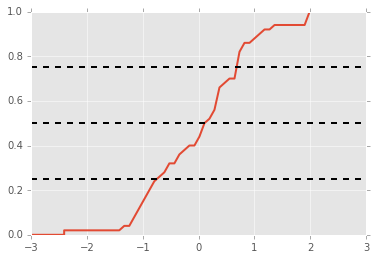

In [16]:
plot_cdf(rnd.randn(50), [-3, 3], 1.0, lw=2)
for v in [0.25, 0.5, 0.75]:
    plt.axhline(v, lw=2, ls='--', color='black')

(100,) (100,)
(103,) (103,)


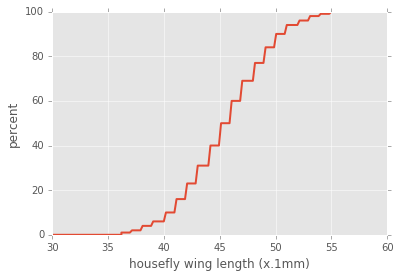

In [19]:
wingLens = np.fromfile('s057.txt', sep='\n', dtype=np.float64)
plot_cdf(wingLens, [30, 60], 100, lw=2)
plt.xlabel('housefly wing length (x.1mm)')
plt.ylabel('percent')